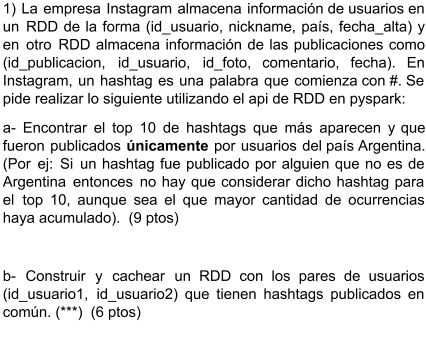

In [1]:
# (id_usuario, nick, pais, fecha alta)
rdd1= sc.parallelize(data1)

rdd2= sc.parallelize(data2)
# (id_publ, id_usuario, id_foto, comentario, fecha)

In [7]:
def hashtags(x):
    result = []
    texto = x.split()
    for palabra in texto:
        if palabra[0]=="#":
            result.append(palabra)
    return tuple(result)

hashtags("hola como estas #raul #dia")

('#raul', '#dia')

In [ ]:
# id_usuarios, lista de hashtags
rdd2.map(lambda x: (x[1], hashtags(x[4]) ) )

In [ ]:
rdd2.flatMap(lambda x: [(x[0],p) for p in x[1] ])
#id_usuario, hashtag

In [ ]:
rdd1.map(lambda x: (x[0],x[2]))
#id_usuario, pais

In [ ]:
result = rdd1.rightOutterJoin(rdd2)
#id_usuario, hashtag, pais

In [ ]:
result_a.map(lambda x: (x[1],x[2]) )
# hashtag, pais

In [ ]:
result_a.groupByKey()
# hashtag, lista de paises

In [9]:
def soloarg(x):
    result = "ARG".isin(x)
    if result:
        for pais in x:
            if pais != "ARG":
                return False
    return result

In [ ]:
result_a.filter(lambda x: soloarg(x[1]) )

Para el b

In [ ]:
result_b.map(lambda x: (x[1],x[0]) )
# hashtag, id_usuario

In [ ]:
result_b.groupByKey()
# hashtag, id_usuario

In [ ]:
result_b.map(lambda x: tuple(x[1]) )